![dance party](dance_party.jpg)

## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.|
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.|
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.|
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

**Summary**

As we can see above this project attempts to predict the danceability variable and thereby put together a playlist of 50 songs with good danceability, the variable "playlist" puts together the prediction of top 50 songs with good danceability

The explaination of each variables is the is mentioned above

**Importing necessary libraries**

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
spotify = pd.read_csv('spotify.csv')
spotify.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [119]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

In [120]:
# Check for missing values
spotify.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

There is only one missing value in artists, album_name, track_name column

In [121]:
#Display null values
spotify[spotify.isna().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65326,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0.0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [122]:
#Drop missing values
spotify = spotify.dropna()
spotify.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [123]:
# Check for Duplicates
spotify[spotify.duplicated(subset = 'track_name')].head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18,2qLMf6TuEC3ruGJg4SMMN6,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,68,189613.0,False,0.625,0.414,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.6690,130.088,4,acoustic
20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946.0,False,0.703,0.444,11,-9.331,1,0.0417,0.559,0.000000,0.0973,0.7120,150.960,4,acoustic
22,5TvE3pk05pyFIGdSY9j4DJ,A Great Big World;Christina Aguilera,Is There Anybody Out There? - Track by Track C...,Say Something,70,229400.0,False,0.407,0.147,2,-8.822,1,0.0355,0.857,0.000003,0.0913,0.0765,141.284,3,acoustic
28,5QAMZTM5cmLg3fHX9ZbTZi,Jason Mraz,Christmas Time,Winter Wonderland,0,131760.0,False,0.620,0.309,5,-9.209,1,0.0495,0.788,0.000000,0.1460,0.6640,145.363,4,acoustic
29,2qESE1ZeWly7I3YjyTXmXh,Jason Mraz,Perfect Christmas Hits,Winter Wonderland,0,131760.0,False,0.620,0.309,5,-9.209,1,0.0495,0.788,0.000000,0.1460,0.6640,145.363,4,acoustic
30,3EQV1ZHtHvq9OnVRYIdbg3,Jason Mraz,Merry Christmas,Winter Wonderland,0,131760.0,False,0.620,0.309,5,-9.209,1,0.0495,0.788,0.000000,0.1460,0.6640,145.363,4,acoustic
31,3ax0rfGb7exLtl02LL08U9,Jason Mraz,Christmas Music - Holiday Hits,Winter Wonderland,0,131760.0,False,0.620,0.309,5,-9.209,1,0.0495,0.788,0.000000,0.1460,0.6640,145.363,4,acoustic
34,0xbMRcMFqxJq1Wa7tvWPtn,Brandi Carlile;Sam Smith,Feeling Good - Adult Pop Favorites,Party of One,0,259558.0,False,0.296,0.206,0,-11.799,1,0.0412,0.782,0.000225,0.0959,0.2020,165.400,4,acoustic
35,6h061f44HZPj1OXO2nA45d,Brandi Carlile;Sam Smith,Mellow Bars R'n'B,Party of One,0,259558.0,False,0.296,0.206,0,-11.799,1,0.0412,0.782,0.000225,0.0959,0.2020,165.400,4,acoustic
39,0adVktNVJXPZfhQe6B1NO5,KT Tunstall,sadsadchristmas,Lonely This Christmas,0,257493.0,False,0.409,0.153,6,-10.740,0,0.0306,0.939,0.000026,0.1080,0.1800,85.262,4,acoustic


In [124]:
#dropping duplicates
spotify = spotify.drop_duplicates(subset = 'track_name')
spotify[spotify.duplicated(subset = 'track_name')]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


## **Explore numeric Variables**

In [125]:
numeric_variables = spotify.select_dtypes(['int', 'float'])
print(numeric_variables.columns)

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')


In [126]:
numeric_variables.nunique()

popularity            101
duration_ms         46452
danceability         1155
energy               2025
key                    12
loudness            18626
mode                    2
speechiness          1479
acousticness         5011
instrumentalness     5310
liveness             1716
valence              1773
tempo               41618
time_signature          4
dtype: int64

In [127]:
#Printing number of unique elements, max, min and Unique elements
from tabulate import tabulate

# Assuming numeric_variables is a DataFrame with numeric columns
results = []

for col in numeric_variables.columns:
    if col != 'danceability':
      num_unique_elements = numeric_variables[col].nunique()
      max_val = numeric_variables[col].max()
      min_val = numeric_variables[col].min()
      unique_vals = numeric_variables[col].unique()
      results.append([col, num_unique_elements, max_val, min_val, unique_vals])

# Create a DataFrame for tabulate
results_df = pd.DataFrame(results, columns=["Feature", "Number of unique elements", "Max", "Min", "Unique elements"])

# Print the results using tabulate in a neat table format
print(tabulate(results_df, headers="keys", tablefmt="psql"))


+----+------------------+-----------------------------+--------------+----------+--------------------------------------------------------------------------+
|    | Feature          |   Number of unique elements |          Max |      Min | Unique elements                                                          |
|----+------------------+-----------------------------+--------------+----------+--------------------------------------------------------------------------|
|  0 | popularity       |                         101 | 100          |    0     | [ 73  55  57  71  82  58  74  80  56  69  52  62  54  67  63   0   1  46 |
|    |                  |                             |              |          |   61  60  68  51  75  66  64  65  44  70  45  50  59  49  53  47  43  42 |
|    |                  |                             |              |          |   20  22  35  19  24  18  23  40  38  41  30  37  39  48  36  34  26  32 |
|    |                  |                             |   

In [128]:
# as we can see the loudness value is negative and it does not exist so converting negative loudness to positive loudness
spotify['loudness'] = spotify['loudness'].apply(lambda x: x * -1 if x < 0 else x)
# Checking if any negative loudness is present after transforming
spotify[spotify['loudness'] < 0]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [129]:
# Separate numeric columns into categorical and continuous
categorical_num_cols = []
continuous_num_cols = []

for col in numeric_variables:
    # Check if a column has a small number of unique values to consider it categorical
    if len(numeric_variables[col].unique()) <= 12:
        categorical_num_cols.append(col)
    else:
        continuous_num_cols.append(col)

# Print the results
print("Categorical columns:", categorical_num_cols)
print("Continuous columns:", continuous_num_cols)

Categorical columns: ['key', 'mode', 'time_signature']
Continuous columns: ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


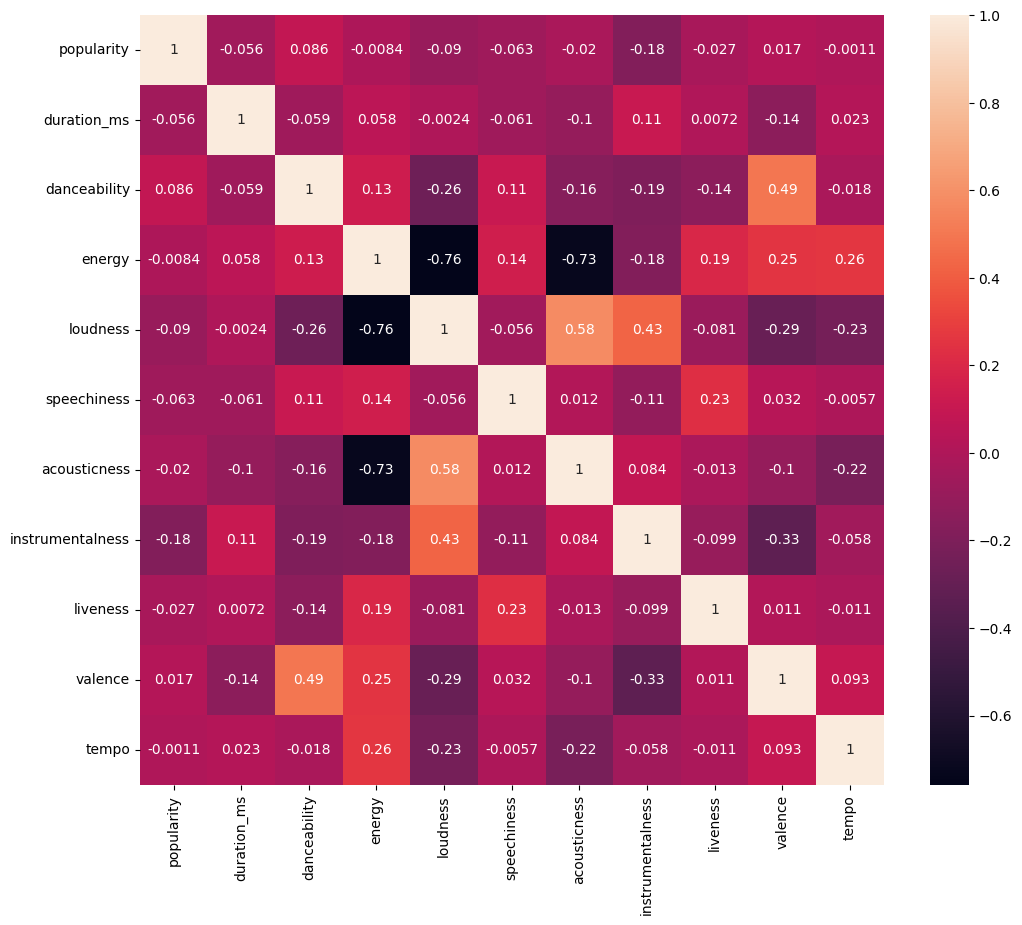

In [130]:
plt.figure(figsize=(12, 10))
sns.heatmap(spotify[continuous_num_cols].corr(), annot = True)
plt.show()

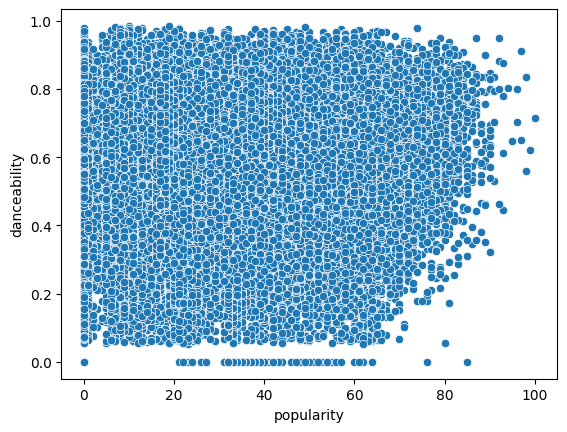

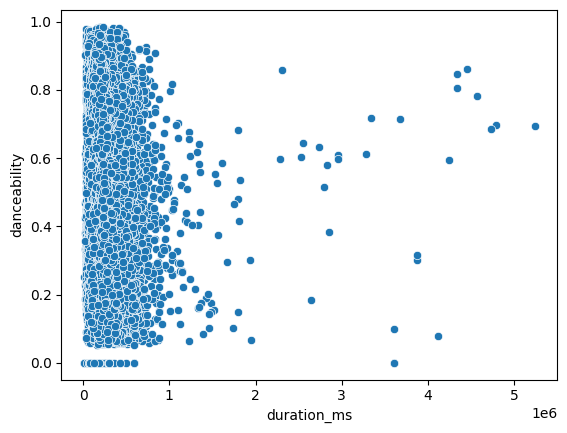

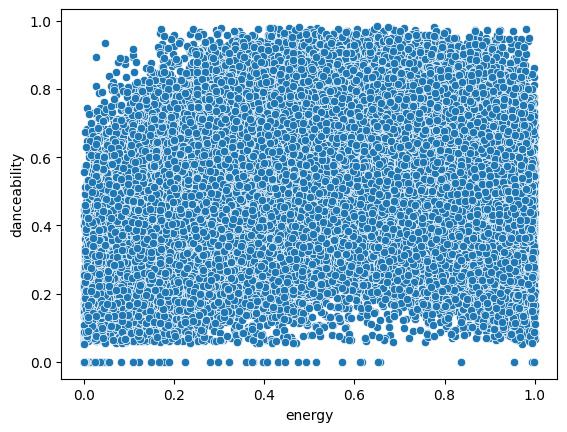

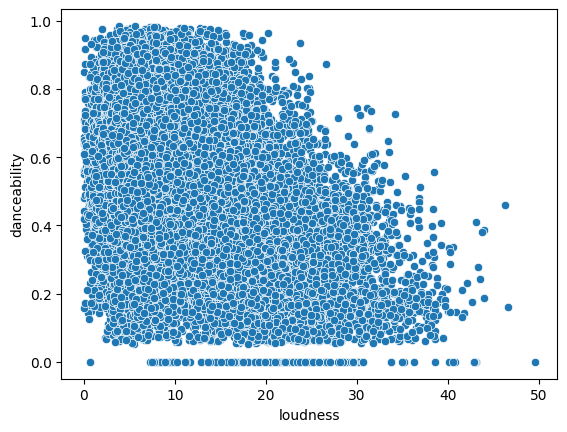

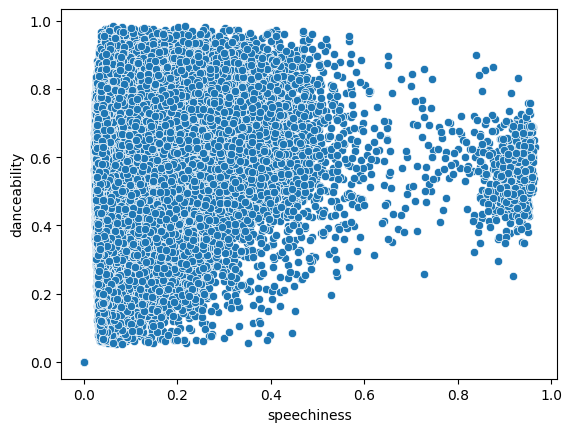

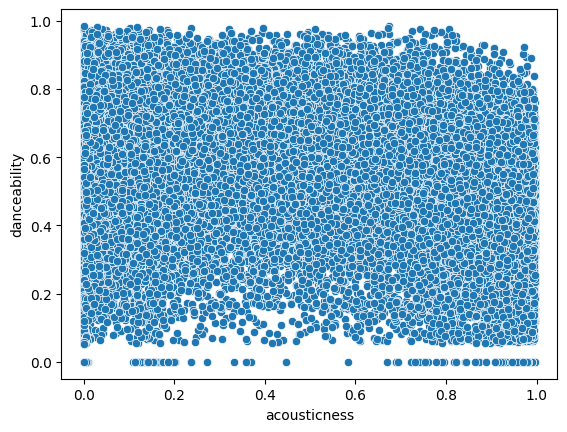

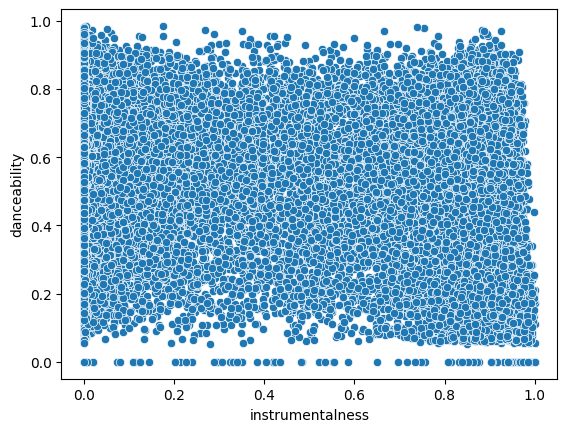

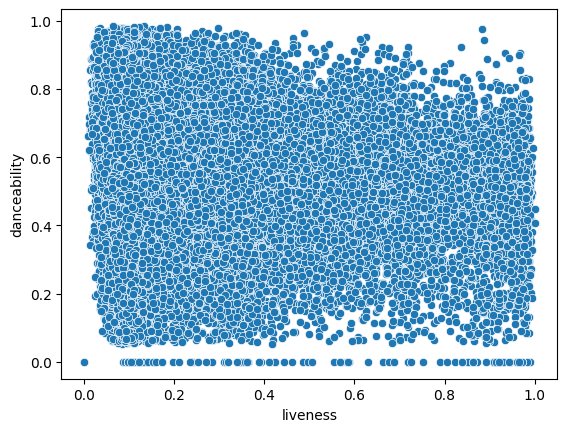

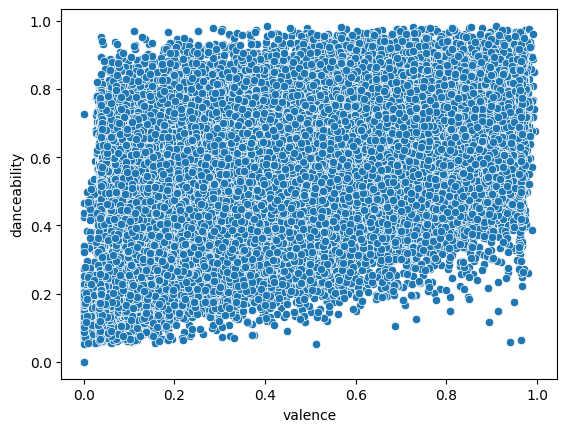

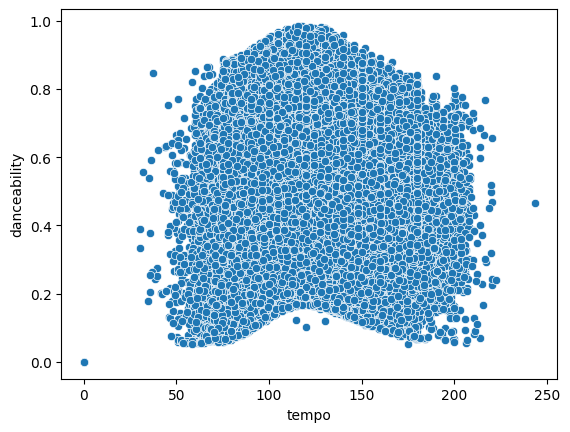

In [131]:
for cols in continuous_num_cols:
  if cols != 'danceability':
    sns.scatterplot(data = spotify, x = cols, y = 'danceability')
    plt.show()

# **Categorical Variables**

In [132]:
categorical_variables = list(set(spotify.columns) - set(continuous_num_cols) - set(['artists','track_name','track_id','album_name']))
print(categorical_variables)

['key', 'mode', 'time_signature', 'track_genre', 'explicit']


In [133]:
spotify['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [134]:
track_genre_count= spotify['track_genre'].value_counts()
print(len(track_genre_count))

113


In [135]:
max(spotify['track_genre'].value_counts())

961

In [136]:
track_genre_ab_900 = track_genre_count[track_genre_count>900].index
print(track_genre_ab_900)
print(len(track_genre_ab_900))

Index(['black-metal', 'heavy-metal', 'afrobeat', 'cantopop', 'bluegrass',
       'forro', 'anime', 'chicago-house', 'breakbeat', 'comedy', 'acoustic',
       'brazil'],
      dtype='object')
12


In [137]:
track_genre_ab_900= spotify[spotify[('track_genre')].isin(track_genre_ab_900)]

<Axes: xlabel='track_genre', ylabel='danceability'>

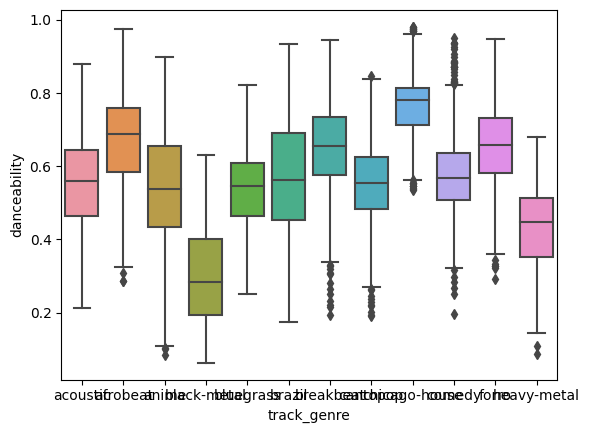

In [138]:
sns.boxplot(data=track_genre_ab_900, x ='track_genre' , y = 'danceability')

In [139]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72935 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          72935 non-null  object 
 1   artists           72935 non-null  object 
 2   album_name        72935 non-null  object 
 3   track_name        72935 non-null  object 
 4   popularity        72935 non-null  int64  
 5   duration_ms       72935 non-null  float64
 6   explicit          72935 non-null  bool   
 7   danceability      72935 non-null  float64
 8   energy            72935 non-null  float64
 9   key               72935 non-null  int64  
 10  loudness          72935 non-null  float64
 11  mode              72935 non-null  int64  
 12  speechiness       72935 non-null  float64
 13  acousticness      72935 non-null  float64
 14  instrumentalness  72935 non-null  float64
 15  liveness          72935 non-null  float64
 16  valence           72935 non-null  float

<Figure size 640x480 with 0 Axes>

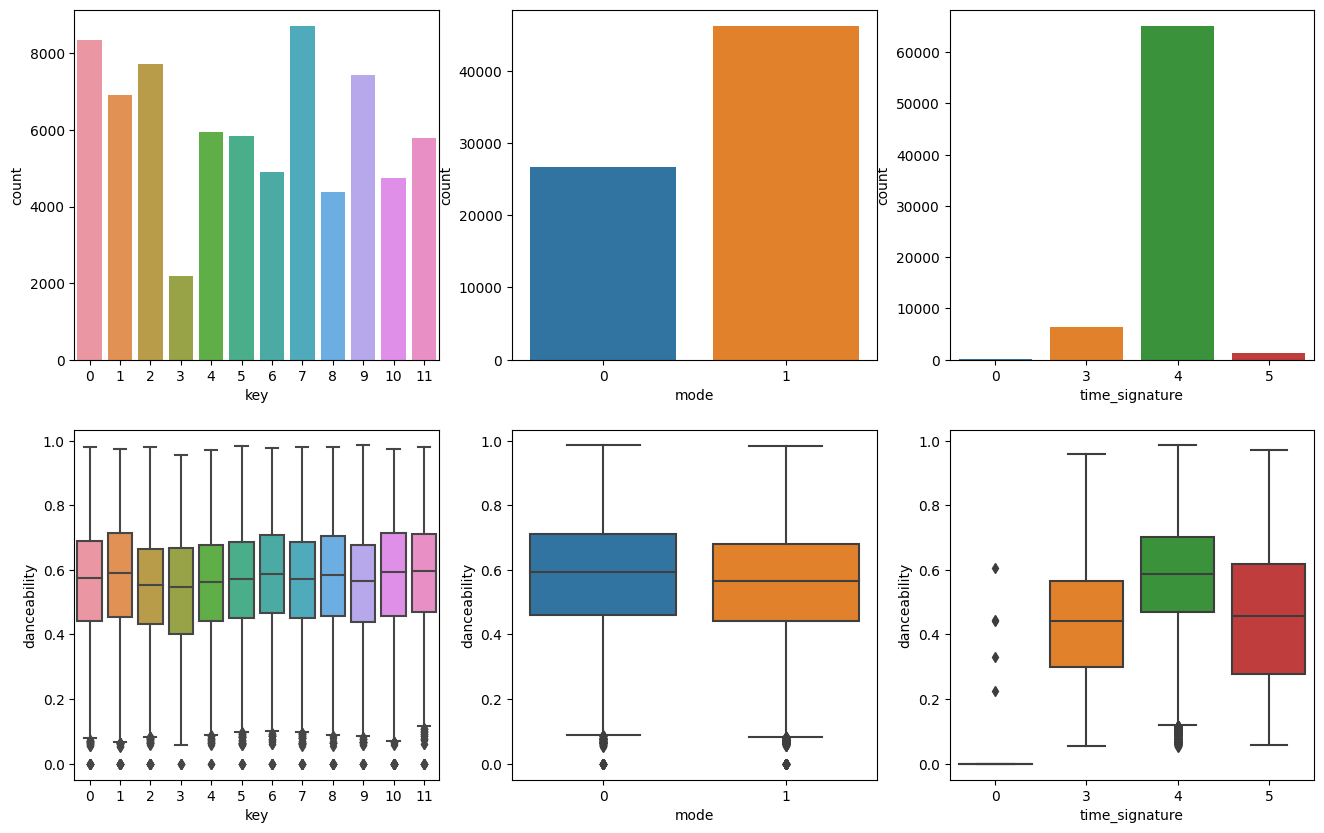

<Figure size 1600x1000 with 0 Axes>

In [140]:
ix = 1
plt.tight_layout()
fig = plt.figure(figsize = (16,10))
for c in list(spotify[categorical_variables].columns):
    if ix <= 3 and c not in ['danceability', 'track_genre']:
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = spotify, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=spotify, x=c, y='danceability', ax=ax2)

    ix = ix +1
    if ix == 4:
        fig = plt.figure(figsize = (16,10))
        plt.show()
        ix =1

In [141]:
# Dropping all outliers
Q1 = spotify['danceability'].quantile(0.25)
Q3 = spotify['danceability'].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers (adjust as needed)
threshold = 1.5

# Find the indices of outliers
outlier_indices = spotify[(spotify['danceability'] < (Q1 - threshold * IQR)) | (spotify['danceability'] > (Q3 + threshold * IQR))].index

# Drop the outliers from the DataFrame
spotify = spotify.drop(outlier_indices)

# Print the cleaned DataFrame
print(spotify.head())
print(spotify.shape)


                 track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73     230666.0     False   
1            Ghost - Acoustic          55     149610.0     False   
2              To Begin Again          57     210826.0     False   
3  Can't Help Falling In Love          71     201933.0     False   
4   

In [142]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72572 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          72572 non-null  object 
 1   artists           72572 non-null  object 
 2   album_name        72572 non-null  object 
 3   track_name        72572 non-null  object 
 4   popularity        72572 non-null  int64  
 5   duration_ms       72572 non-null  float64
 6   explicit          72572 non-null  bool   
 7   danceability      72572 non-null  float64
 8   energy            72572 non-null  float64
 9   key               72572 non-null  int64  
 10  loudness          72572 non-null  float64
 11  mode              72572 non-null  int64  
 12  speechiness       72572 non-null  float64
 13  acousticness      72572 non-null  float64
 14  instrumentalness  72572 non-null  float64
 15  liveness          72572 non-null  float64
 16  valence           72572 non-null  float

# **Building machine learning model**

In [143]:
X = spotify.drop(['artists','track_name','track_id','album_name','danceability'], axis = 'columns')
y = spotify['danceability']

In [144]:
X = pd.get_dummies(X, columns=categorical_variables)

In [145]:
X.head()

,popularity,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,explicit_False,explicit_True
0,73,230666.0,0.4610,6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,...,0,0,0,0,0,0,0,0,1,0
1,55,149610.0,0.1660,17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,...,0,0,0,0,0,0,0,0,1,0
2,57,210826.0,0.3590,9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,...,0,0,0,0,0,0,0,0,1,0
3,71,201933.0,0.0596,18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,...,0,0,0,0,0,0,0,0,1,0
4,82,198853.0,0.4430,9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,...,0,0,0,0,0,0,0,0,1,0


In [146]:
len(X)

72572

In [147]:
len(y)

72572

In [148]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [149]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)


In [150]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.01
R-squared (R2): 0.56


In [151]:
#Ridge Regression
from sklearn.linear_model import Ridge

alpha = 1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.01
R-squared (R2): 0.56


In [152]:
from sklearn.linear_model import Lasso

alpha = 0.1

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Mean Squared Error (MSE): 0.03
R-squared (R2): -0.00


In [153]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_model = AdaBoostRegressor(n_estimators=100, random_state=0)

adaboost_model.fit(X_train, y_train)

y_pred = adaboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.01719350192245733
R-squared: 0.43064969797829356


In [165]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state = 40)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.010749948287288874
R-squared: 0.6440232867225635


We have used 4 models Linear Regression, Ridge regression, Lasso Regression, adaboost and Random forest, we see that the random forest model performs well with good MSE and R2 score, so we will use Random Forest for our further analysis

Note: I tried SVR(Support Vector regression) and other emsemble models but the training time was too long, I also tried XGboost but the MSE and R2 were not good as random forest.


In [166]:
#Parameters of random forest regressor
rf_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}

In [167]:
# Make predictions on the feature variables
predictions = rf_regressor.predict(X)
result_df = pd.concat([X, y], axis=1)
result_df['Predicted_y'] = predictions
result_df = result_df.sort_values(by='Predicted_y', ascending=False)
top_50 = result_df.head(50)
top_50.head()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,popularity,duration_ms,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,explicit_False,explicit_True,danceability,Predicted_y
112554,26,64470.0,0.0173,43.043,0.763,0.000074,0.91300,0.1300,0.631,77.255,...,0,0,0,0,0,1,1,0,0.411,0.61258
104811,9,114418.0,0.3740,9.742,0.729,0.110000,0.02080,0.0764,0.961,85.868,...,0,0,0,0,0,0,1,0,0.859,0.59451
21102,34,169351.0,0.4160,15.682,0.835,0.060700,0.00000,0.1100,0.643,120.874,...,0,0,0,0,0,0,0,1,0.675,0.59265
18542,22,207586.0,0.6300,9.640,0.789,0.134000,0.00000,0.1000,0.711,70.581,...,0,0,0,0,0,0,0,1,0.677,0.59236
26216,22,51320.0,0.4620,15.791,0.587,0.022700,0.00173,0.0958,0.903,78.184,...,0,0,0,0,0,0,1,0,0.454,0.58243


In [170]:
# merging feature variables and the original dataframe using row index numbers
merged_df = spotify.merge(top_50, left_index=True, right_index=True, how='inner')
#sort rows based on predicted y
sorted_df = merged_df.sort_values(by = 'Predicted_y', ascending = False)

In [172]:
final_df = sorted_df.loc[:, ['track_name', 'album_name','artists','danceability_y','Predicted_y' ]]
final_df

,track_name,album_name,artists,danceability_y,Predicted_y
112554,Sonidos de Aves,Sonidos de Aves,Sonidos De Aves,0.411,0.61258
104811,Anoroc,"Experimentals, Pt. 3",Sless Praismo,0.859,0.59451
21102,Seh Yuh Bad,Seh Yuh Bad,6t6;T.O.K;Squash;Rygin King,0.675,0.59265
18542,Cracker Ass Fantastic,Dirt Nasty,Dirt Nasty,0.677,0.59236
26216,Na Corda da Viola (feat. Coro Infantil Do Rio ...,Muito Prazer,Ju Cassou;Coro Infantil Do Rio De Janeiro,0.454,0.58243
36909,Nada É por Acaso,Nada É por Acaso,MC Paulin da Capital;Dj GM;DJ BUNE,0.673,0.58151
37591,Robin Hood,Robin Hood,Mc PP da VS,0.650,0.58126
21306,Tek Him,Strictly The Best Vol. 5,Mad Cobra,0.723,0.58024
66260,"Bikers Shuffle, Pt. 2",The Bikers Shuffle Collection,Big Mucci,0.964,0.57965
65743,Clap With Me,Mr Chris' Hip Hop for Tots,Christopher Zondaflex Tyler,0.903,0.57911


In [174]:
#Print final playlist of songs
playlist = final_df.loc[:, ['track_name', 'album_name','artists']]
playlist

,track_name,album_name,artists
112554,Sonidos de Aves,Sonidos de Aves,Sonidos De Aves
104811,Anoroc,"Experimentals, Pt. 3",Sless Praismo
21102,Seh Yuh Bad,Seh Yuh Bad,6t6;T.O.K;Squash;Rygin King
18542,Cracker Ass Fantastic,Dirt Nasty,Dirt Nasty
26216,Na Corda da Viola (feat. Coro Infantil Do Rio ...,Muito Prazer,Ju Cassou;Coro Infantil Do Rio De Janeiro
36909,Nada É por Acaso,Nada É por Acaso,MC Paulin da Capital;Dj GM;DJ BUNE
37591,Robin Hood,Robin Hood,Mc PP da VS
21306,Tek Him,Strictly The Best Vol. 5,Mad Cobra
66260,"Bikers Shuffle, Pt. 2",The Bikers Shuffle Collection,Big Mucci
65743,Clap With Me,Mr Chris' Hip Hop for Tots,Christopher Zondaflex Tyler
